# BRAIN TUMOR DETECTION

IMPORT MODULES

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(r"C:\Users\sweth\OneDrive\Pictures\Desktop\Test Jupyter\Training",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(r"C:\Users\sweth\OneDrive\Pictures\Desktop\Test Jupyter\Training",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(5740, 150, 150, 3)

TRAIN TEST SPLIT

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

CONVOLUTION NEURAL NETWORK

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
146/146 [==============================] - 567s 4s/step - loss: 1.4733 - accuracy: 0.4111 - val_loss: 0.9933 - val_accuracy: 0.5609
Epoch 2/10
146/146 [==============================] - 1025s 7s/step - loss: 0.8348 - accuracy: 0.6345 - val_loss: 0.7815 - val_accuracy: 0.6615
Epoch 3/10
146/146 [==============================] - 479s 3s/step - loss: 0.6570 - accuracy: 0.7238 - val_loss: 0.6873 - val_accuracy: 0.6847
Epoch 4/10
146/146 [==============================] - 421s 3s/step - loss: 0.4984 - accuracy: 0.7991 - val_loss: 0.5226 - val_accuracy: 0.7834
Epoch 5/10
146/146 [==============================] - 437s 3s/step - loss: 0.3686 - accuracy: 0.8567 - val_loss: 0.4526 - val_accuracy: 0.8085
Epoch 6/10
146/146 [==============================] - 407s 3s/step - loss: 0.3106 - accuracy: 0.8795 - val_loss: 0.4414 - val_accuracy: 0.7892
Epoch 7/10
146/146 [==============================] - 401s 3s/step - loss: 0.2666 - accuracy: 0.8983 - val_loss: 0.4118 - val_accuracy: 0.824

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

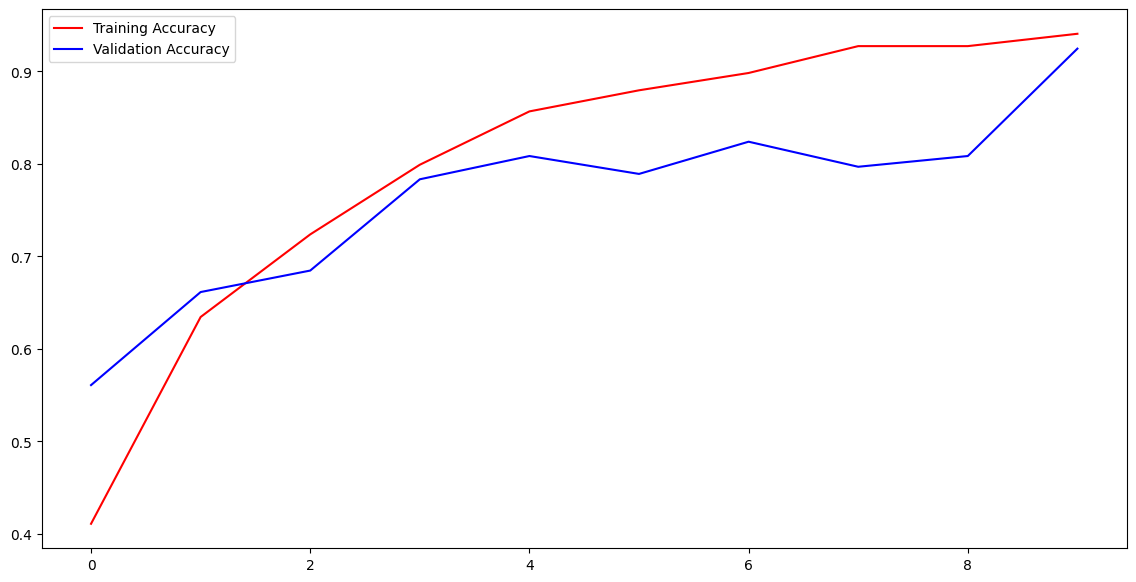

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

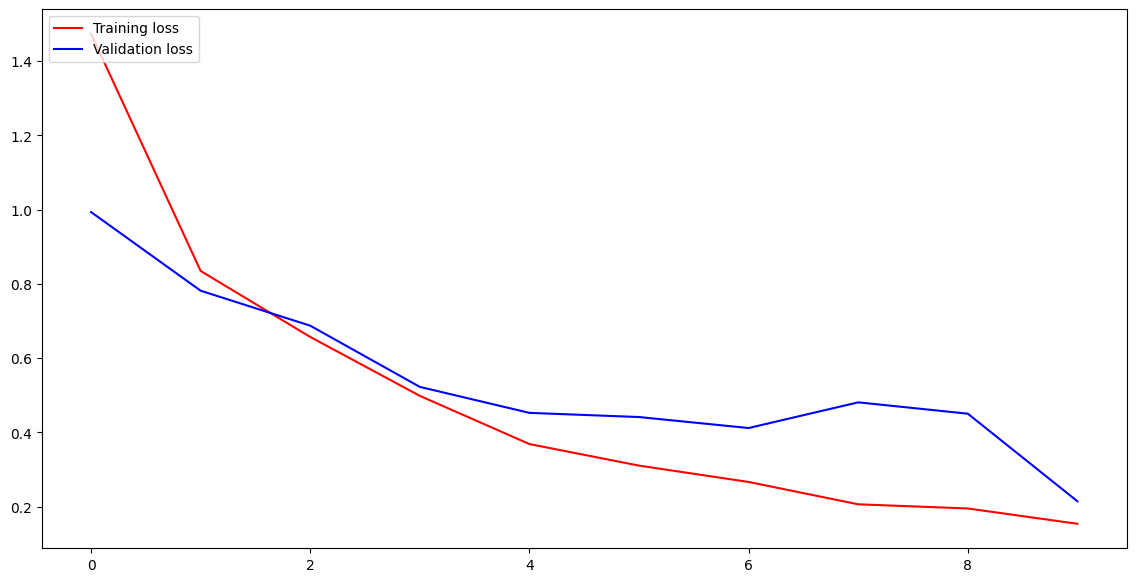

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

PREDICTION

In [25]:
img = cv2.imread(r"C:\Users\sweth\OneDrive\Pictures\Desktop\Test Jupyter\Training/pituitary_tumor/p (107).jpg")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(512, 512, 3)

In [26]:

img_array.shape

(512, 512, 3)

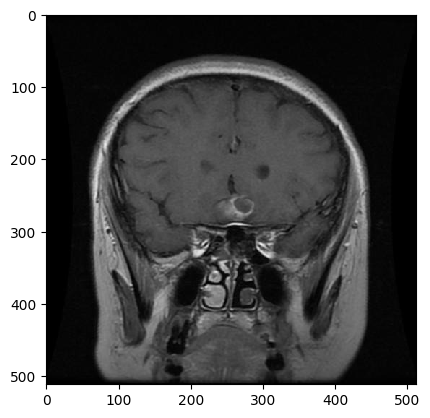

In [32]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r"C:\Users\sweth\OneDrive\Pictures\Desktop\Test Jupyter\Training/pituitary_tumor/p (107).jpg")
plt.imshow(img,interpolation='nearest')
plt.show()

In [36]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 79ms/step


3

                                                                                                                SWETHA S